# Black-Scholes Option Pricer Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from black_scholes import BlackScholesPricer

plt.style.use('seaborn-v0_8-whitegrid')

## 1. Basic Call Option Pricing

In [2]:
S = 100  # underlying price
K = 105  # strike
T = 1    # time until expiration in years
r = 0.05 # risk free rate
sigma = 0.2 # vol

call_option = BlackScholesPricer(S, K, T, r, sigma, call=True)
print(f"The price of the call option is: {call_option.price:.2f}")

The price of the call option is: 8.02


## 2. Basic Put Option Pricing

In [3]:
put_option = BlackScholesPricer(S, K, T, r, sigma, call=False)
print(f"The price of the put option is: {put_option.price:.2f}")

The price of the put option is: 7.90


## 3. Option Pricing with a given ticker
We can use the options pricer to fetch the latest price of an option using a ticker symbol and use that as our `S` value. 

In [10]:
example_ticker = "SPY"
spy_option = BlackScholesPricer(ticker=example_ticker, K=700)
print(f"The latest price for {example_ticker} is ${spy_option.S:.2f}")

The latest price for SPY is $639.81


In [15]:
spy_option

SPY (1y) 700 Call: $40.01

## 4. Option Price vs. Spot Price

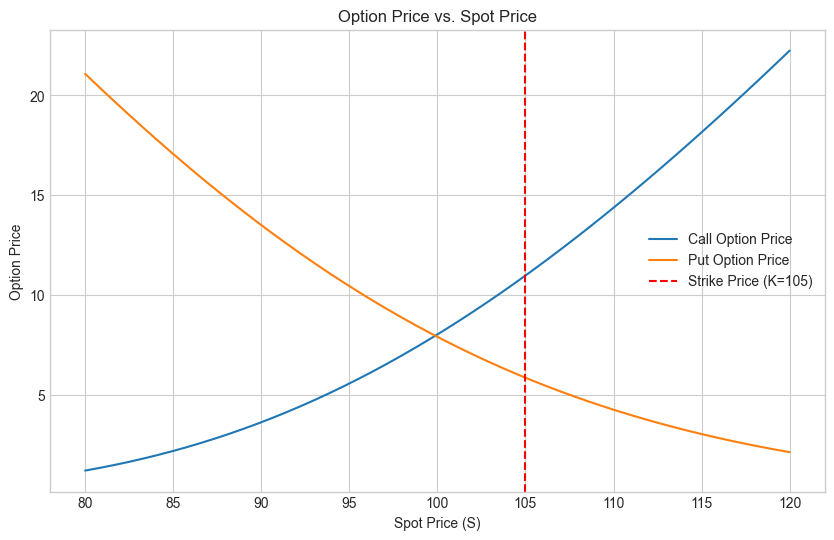

In [4]:
S_range = np.linspace(80, 120, 50)
call_prices = [BlackScholesPricer(s, K, T, r, sigma, call=True).price for s in S_range]
put_prices = [BlackScholesPricer(s, K, T, r, sigma, call=False).price for s in S_range]

plt.figure(figsize=(10, 6))
plt.plot(S_range, call_prices, label='Call Option Price')
plt.plot(S_range, put_prices, label='Put Option Price')
plt.xlabel('Spot Price (S)')
plt.ylabel('Option Price')
plt.title('Option Price vs. Spot Price')
plt.axvline(x=K, color='r', linestyle='--', label=f'Strike Price (K={K})')
plt.legend()
plt.show()

## 5. Option Price vs. Volatility

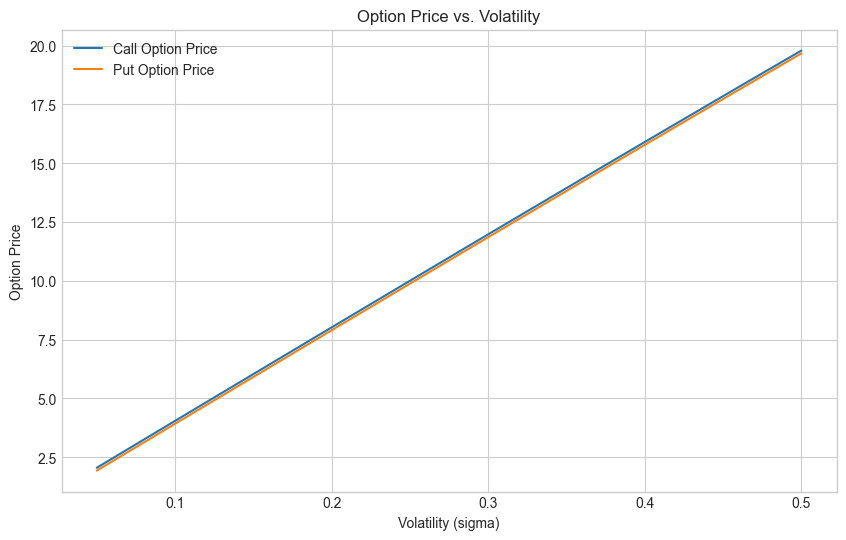

In [5]:
sigma_range = np.linspace(0.05, 0.5, 50)
call_prices_sigma = [BlackScholesPricer(S, K, T, r, sig, call=True).price for sig in sigma_range]
put_prices_sigma = [BlackScholesPricer(S, K, T, r, sig, call=False).price for sig in sigma_range]

plt.figure(figsize=(10, 6))
plt.plot(sigma_range, call_prices_sigma, label='Call Option Price')
plt.plot(sigma_range, put_prices_sigma, label='Put Option Price')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Option Price')
plt.title('Option Price vs. Volatility')
plt.legend()
plt.show()

## 6. Option Price vs. Time to Maturity

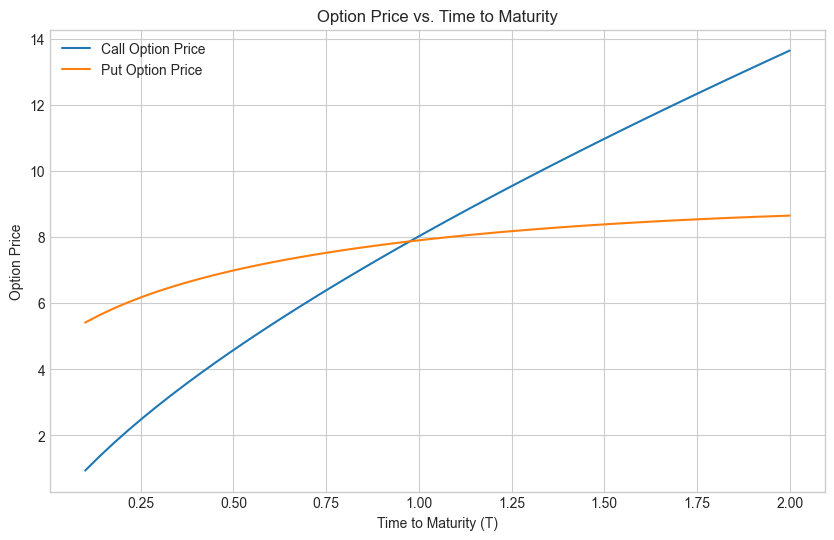

In [6]:
T_range = np.linspace(0.1, 2, 50)
call_prices_T = [BlackScholesPricer(S, K, t, r, sigma, call=True).price for t in T_range]
put_prices_T = [BlackScholesPricer(S, K, t, r, sigma, call=False).price for t in T_range]

plt.figure(figsize=(10, 6))
plt.plot(T_range, call_prices_T, label='Call Option Price')
plt.plot(T_range, put_prices_T, label='Put Option Price')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Option Price')
plt.title('Option Price vs. Time to Maturity')
plt.legend()
plt.show()